In [ ]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.regression_models as modl
import source.trading_strategies.trading_strategy_helpers as tsh
from source.trading_strategies.configs_gw import WITHOUT_LOOKAHEAD, ALL, MINIMAL_SETTING, WITHOUT_LOOKAHEAD_AR, ALL_COVARIATES_NON_AR, ALL_COVARIATES_AR,COMPLETED
data = dp.prepare_data(uselog=True)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.tree_ensemble_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, 
)

1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00


KeyboardInterrupt: 

In [ ]:
from importlib import reload
reload(modl)

In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.tree_ensemble_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, 
)

1965-01-01 00:00:00
[PCR] 1965-01-01 selected k=1 (val R2os vs HA=0.0013)
1965-02-01 00:00:00
[PCR] 1965-02-01 selected k=1 (val R2os vs HA=0.0001)
1965-03-01 00:00:00
[PCR] 1965-03-01 selected k=1 (val R2os vs HA=0.0003)
1965-04-01 00:00:00
[PCR] 1965-04-01 selected k=1 (val R2os vs HA=-0.0018)
1965-05-01 00:00:00
[PCR] 1965-05-01 selected k=1 (val R2os vs HA=-0.0030)
1965-06-01 00:00:00
[PCR] 1965-06-01 selected k=1 (val R2os vs HA=-0.0067)
1965-07-01 00:00:00
[PCR] 1965-07-01 selected k=1 (val R2os vs HA=-0.0065)
1965-08-01 00:00:00
[PCR] 1965-08-01 selected k=1 (val R2os vs HA=-0.0061)
1965-09-01 00:00:00
[PCR] 1965-09-01 selected k=1 (val R2os vs HA=-0.0097)
1965-10-01 00:00:00
[PCR] 1965-10-01 selected k=1 (val R2os vs HA=-0.0109)
1965-11-01 00:00:00
[PCR] 1965-11-01 selected k=1 (val R2os vs HA=-0.0105)
1965-12-01 00:00:00
[PCR] 1965-12-01 selected k=1 (val R2os vs HA=-0.0109)
1966-01-01 00:00:00
[PCR] 1966-01-01 selected k=1 (val R2os vs HA=-0.0100)
1966-02-01 00:00:00
[PCR] 19

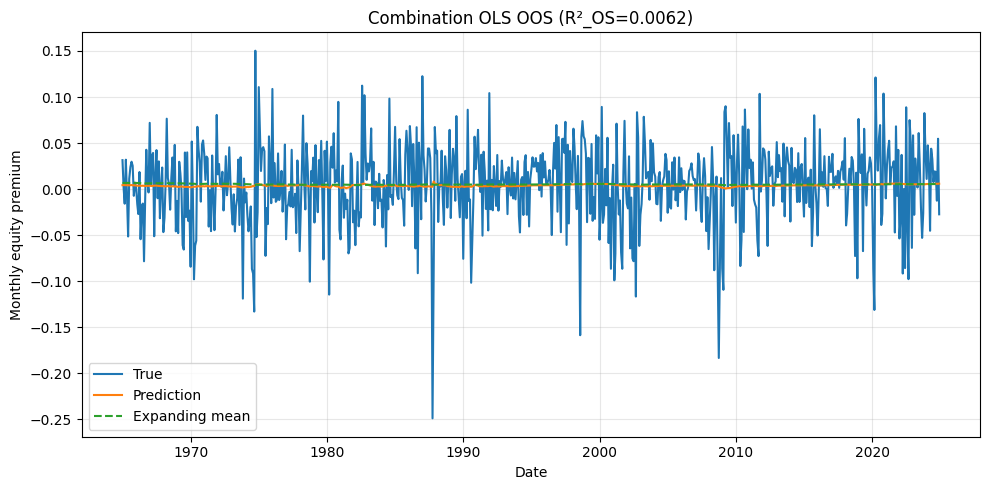

ValueError: columns overlap but no suffix specified: Index(['y_true_Combination_forecast_log', 'y_pred_Combination_forecast_log'], dtype='object')

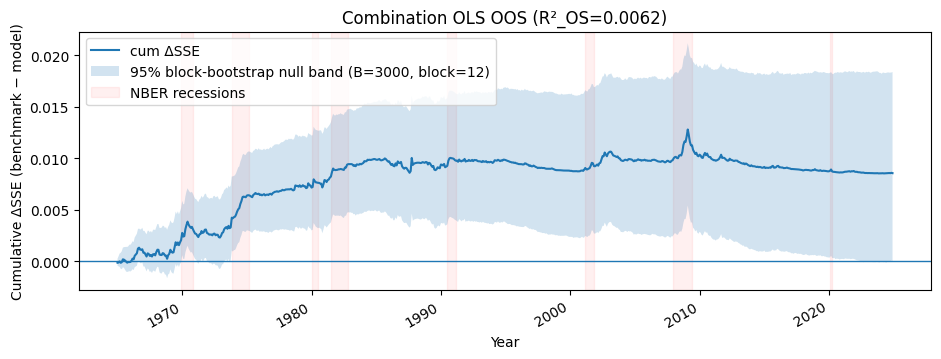

In [15]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.pcr_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)",
min_feat_coverage= 0.6
)
modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="Combination_forecast_log")


1965-01-01 00:00:00
[PCR] 1965-01-01 selected k=1 (val R2os vs HA=0.0013)
1965-02-01 00:00:00
[PCR] 1965-02-01 selected k=1 (val R2os vs HA=0.0001)
1965-03-01 00:00:00
[PCR] 1965-03-01 selected k=1 (val R2os vs HA=0.0003)
1965-04-01 00:00:00
[PCR] 1965-04-01 selected k=1 (val R2os vs HA=-0.0018)
1965-05-01 00:00:00
[PCR] 1965-05-01 selected k=1 (val R2os vs HA=-0.0030)
1965-06-01 00:00:00
[PCR] 1965-06-01 selected k=1 (val R2os vs HA=-0.0067)
1965-07-01 00:00:00
[PCR] 1965-07-01 selected k=1 (val R2os vs HA=-0.0065)
1965-08-01 00:00:00
[PCR] 1965-08-01 selected k=1 (val R2os vs HA=-0.0061)
1965-09-01 00:00:00
[PCR] 1965-09-01 selected k=1 (val R2os vs HA=-0.0097)
1965-10-01 00:00:00
[PCR] 1965-10-01 selected k=1 (val R2os vs HA=-0.0109)
1965-11-01 00:00:00
[PCR] 1965-11-01 selected k=1 (val R2os vs HA=-0.0105)
1965-12-01 00:00:00
[PCR] 1965-12-01 selected k=1 (val R2os vs HA=-0.0109)
1966-01-01 00:00:00
[PCR] 1966-01-01 selected k=1 (val R2os vs HA=-0.0100)
1966-02-01 00:00:00
[PCR] 19

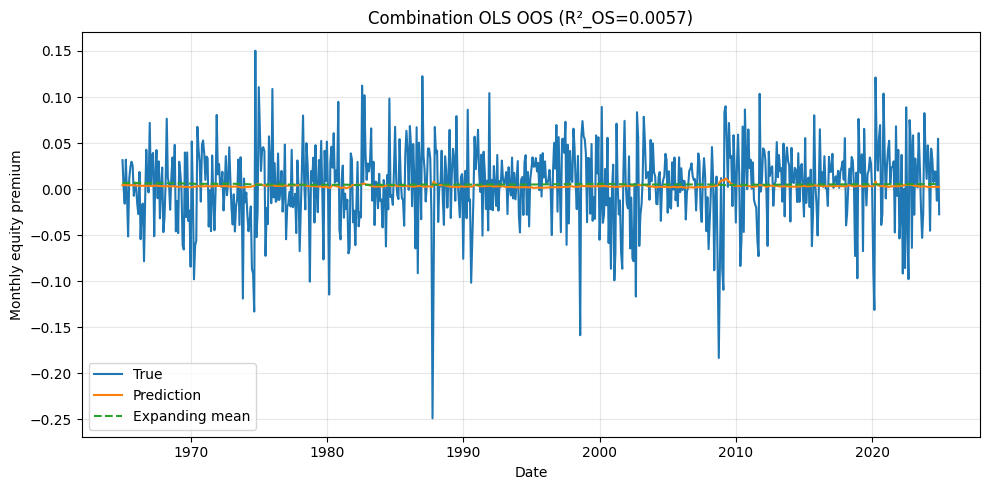

ValueError: columns overlap but no suffix specified: Index(['y_true_Combination_forecast_log', 'y_pred_Combination_forecast_log'], dtype='object')

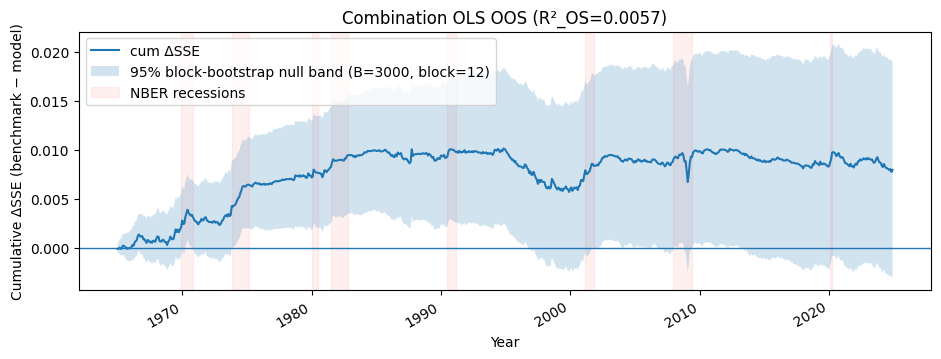

In [16]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.pcr_oos(data, variables=COMPLETED, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)",
min_feat_coverage= 0.6
)
modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="Combination_forecast_log")


1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


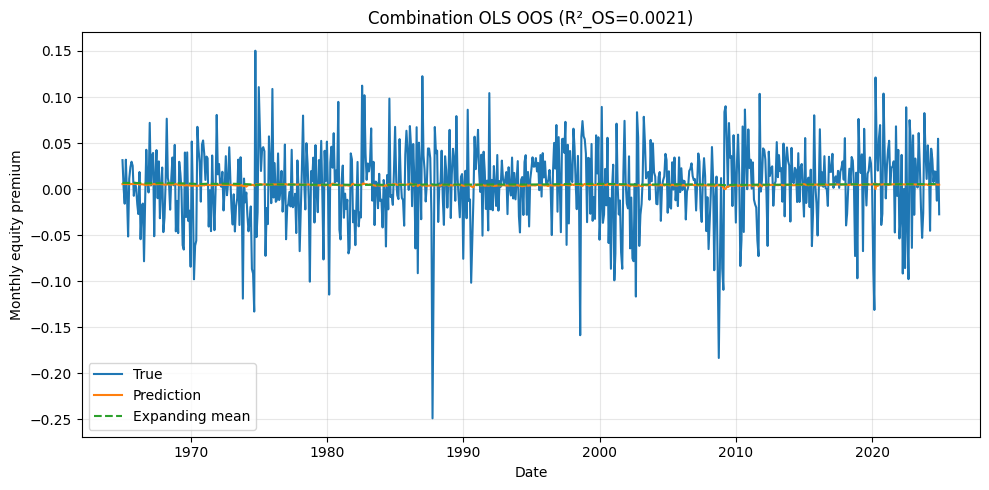

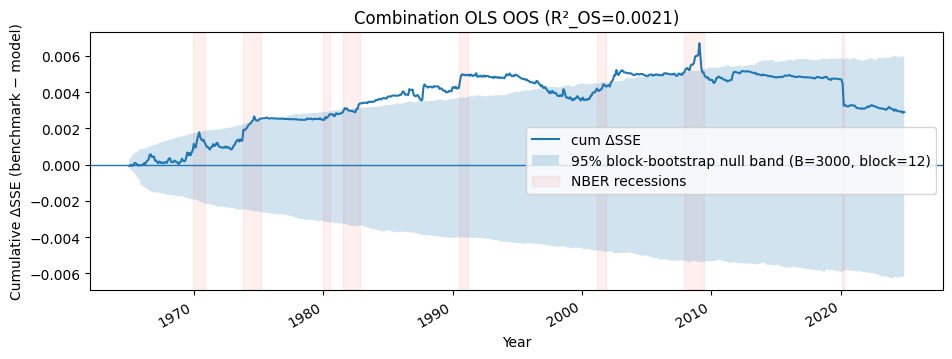

In [23]:
from importlib import reload
reload(tsh)

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


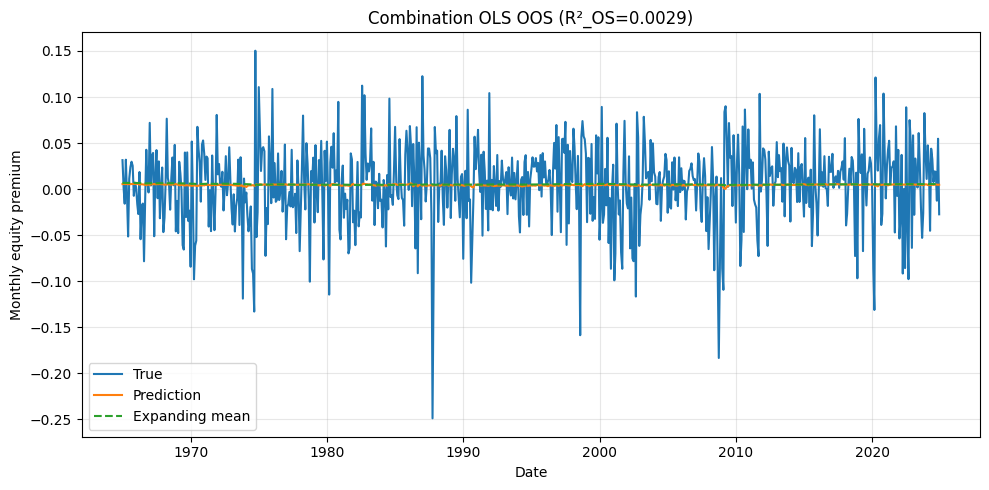

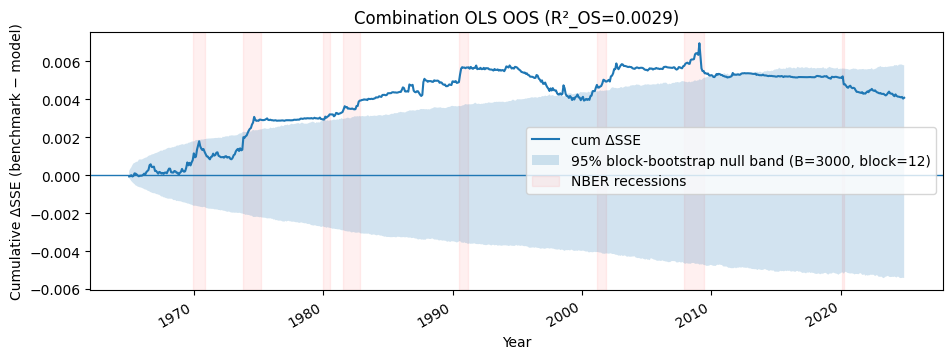

In [24]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=COMPLETED, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
# Pick the monthly variables you actually have in `data`:

monthly_vars = [v for v in ALL_COVARIATES_AR if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
      ct_cutoff=True,
)


percentage of negative forecasts before truncation: 0.76%
Manually calculated R2: -0.003569289482602711
evaluate_oos calculated R2 CT: -0.003569289482602711
Manually calculated Stats: {'mean': -0.0022427278126539675, 'std': 0.01571003726492206, 'lower': -0.03005271161401769, 'upper': 0.028980591103041492}
evaluate_oos calculated R2 WCT: -0.005506742433272649
Stats WCT: {'mean': -0.0040783784820210564, 'std': 0.01666164483523322, 'lower': -0.035754634575656134, 'upper': 0.029600897332521817}
percentage of negative forecasts before truncation: 4.25%
Manually calculated R2: -0.026195497513151977
evaluate_oos calculated R2 CT: -0.026195497513151977
Manually calculated Stats: {'mean': -0.023432670407568874, 'std': 0.017306788382296757, 'lower': -0.05883882933210312, 'upper': -0.0007685785674638696}
evaluate_oos calculated R2 WCT: -0.027436063765937435
Stats WCT: {'mean': -0.026157560743100525, 'std': 0.017754290569910923, 'lower': -0.0631144529236883, 'upper': -0.0010163595523968302}
percen

In [ ]:
r2_arima, stats_arima, y_true_a, y_pred_a, dates_a, _,_,Ha_arima = modl.autoarima_oos(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    seasonal=False,
    m=1,
    auto_arima_kwargs={"d": 0, "stationary": True},
    quiet=False,
    ct_cutoff=True,
    mode="mean",
)
modl.plot_oos(
    y_true_a, y_pred_a, Ha_arima, dates=dates_a,
    title=f"Autoarima OOS (R²_OS={r2_arima:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_a, y_pred_a, Ha_arima,
    dates=dates_a,
    title=f"Combination OLS OOS (R²_OS={r2_arima:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



1970-01-01 00:00:00
[AutoARIMA] Searching best order at 1970-01-01...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

  best order=(2, 0, 2), seasonal_order=(0, 0, 0, 0)


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1970-02-01 00:00:00
1970-03-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1970-04-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-05-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-06-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-07-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-08-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-09-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-10-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-11-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1970-12-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-02-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-03-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-04-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-05-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-06-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-07-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-08-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-09-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-10-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-11-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1971-12-01 00:00:00


In [4]:
r2_c, stats_c, y_true_c, y_pred_c, dates_c, y_lower, y_upper, HA_c = modl.chronos_oos(
    data, start_oos="1965-01-01", quiet=True, ct_cutoff=True, freq='M', mode="mean", ci=0.8
)
modl.plot_oos(
    y_true_c, y_pred_c, HA_c, dates=dates_c, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_c, y_pred_c, HA_c,
    dates=dates_c,
    title=f"Chronos Bolt OOS (R²_OS={r2_c:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_c, y_true_c, y_pred_c, model_name="Chronos_Bolt_forecast")

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


KeyboardInterrupt: 

[Chronos-2] Loading amazon/chronos-2 on M freq with 0 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00
1969-04-01 00:00:00
1969-05-01 00:00:00


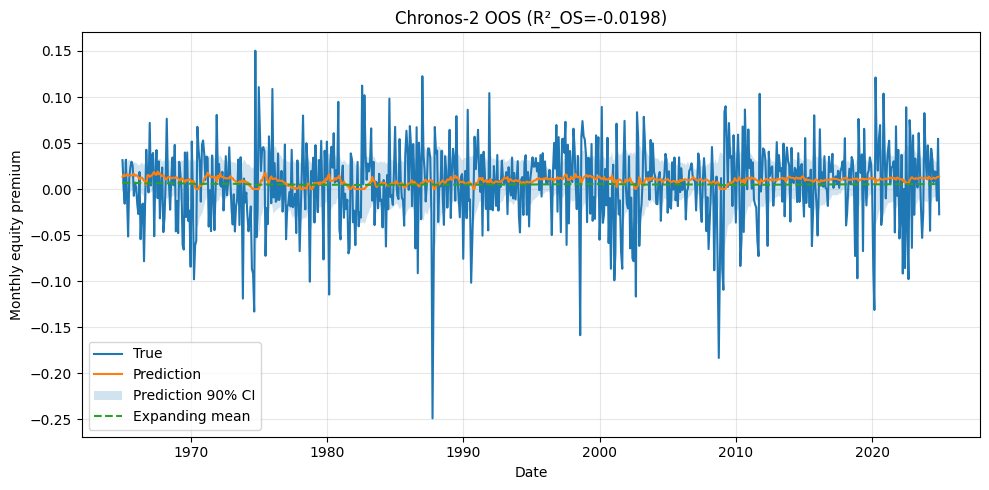

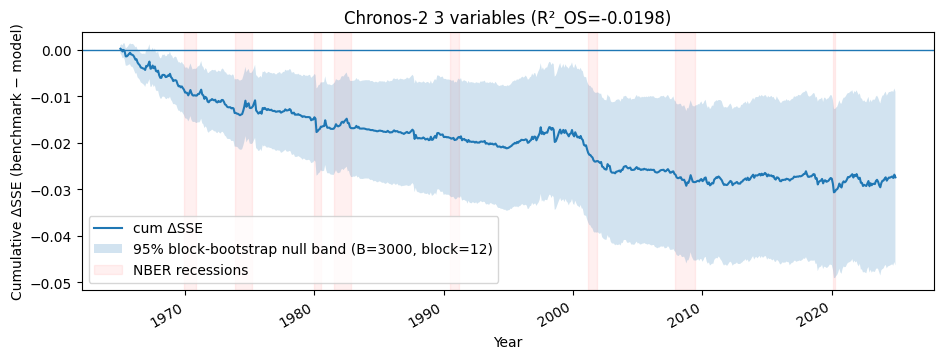

In [6]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=(), start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.5
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=ALL_COVARIATES_NON_AR, start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 all variables OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


[Chronos-2] Loading amazon/chronos-2 on M freq with 28 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


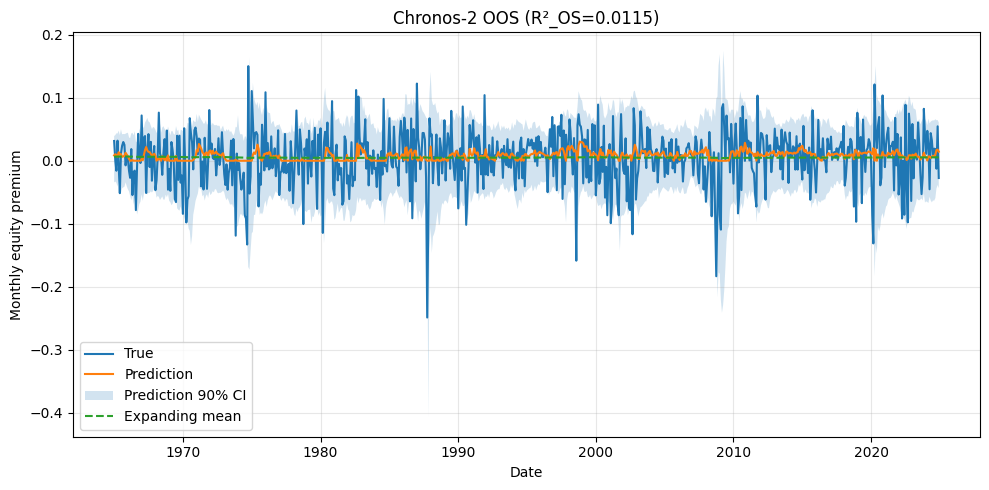

ValueError: columns overlap but no suffix specified: Index(['y_true_Chronos_2_forecast_log', 'y_pred_Chronos_2_forecast_log'], dtype='object')

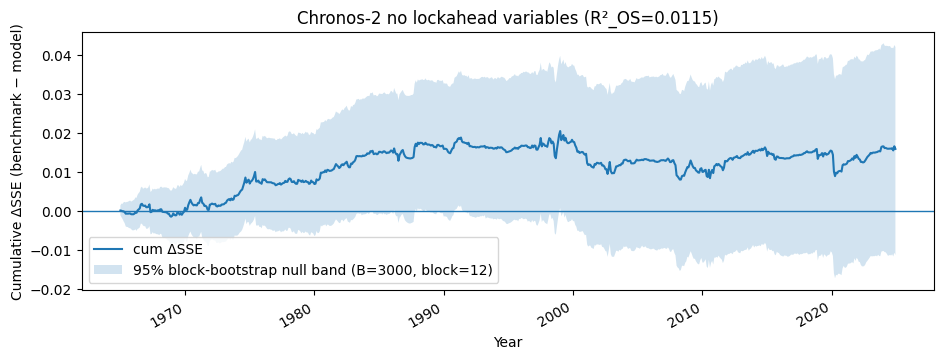

In [8]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium",
    events=False,
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 no lockahead variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    events = False,
    mode = "tube"
)
tsh.save_oos_results(dates_m, y_true_m, y_pred_m, model_name="Chronos_2_forecast_log")
#0.0115  all
# 0.0103 420 
#   0.0034 (±0.0106)          350
# R²_OS=-0.0005 (±0.0107 300
# -0.0072 240
#   -0.0542 30

In [13]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data[data.index >= "1927-01-01"], covariates=COMPLETED, start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 no lockahead variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

[Chronos-2] Loading amazon/chronos-2 on M freq with 22 covariates...


Loading weights:   0%|          | 0/170 [00:00<?, ?it/s]

1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


KeyboardInterrupt: 

[Chronos-2] Loading amazon/chronos-2 on M freq with 0 covariates...


Loading weights:   0%|          | 0/170 [00:00<?, ?it/s]

1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00
1969-04-01 00:00:00
1969-05-01 00:00:00
1969-06-01 00:00:00


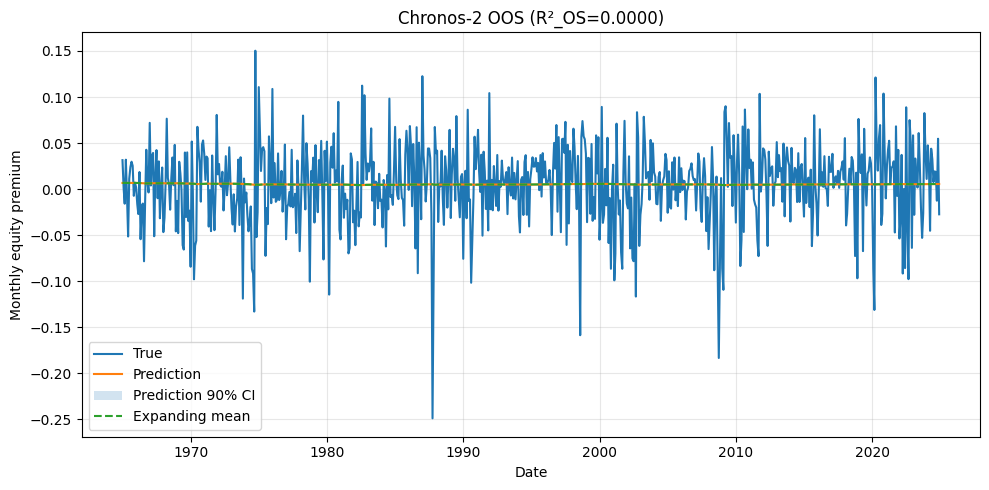

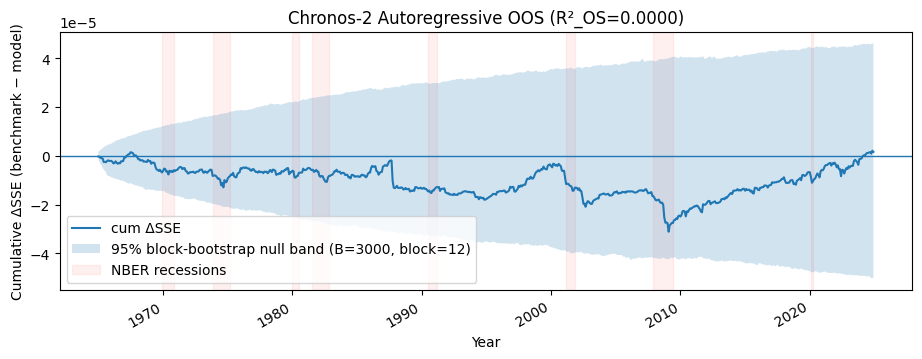

In [12]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M", ci = 0.95,
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
#-0.0193

`torch_dtype` is deprecated! Use `dtype` instead!


[Chronos-2] Loading amazon/chronos-2 on M freq with 0 covariates...


`torch_dtype` is deprecated! Use `dtype` instead!


1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


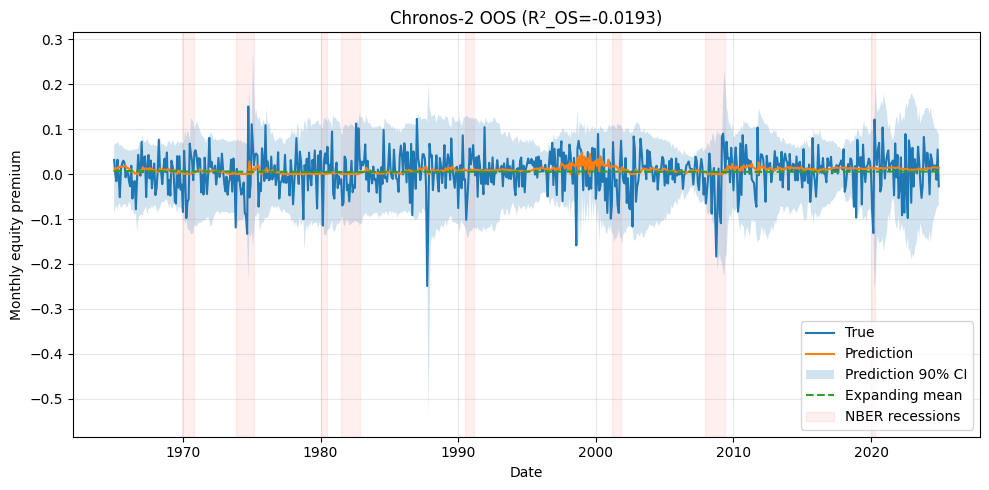

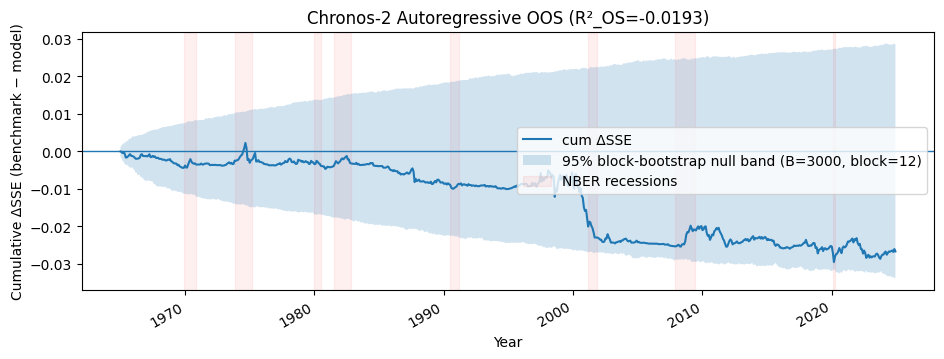

In [4]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M", ci = 0.95,context_length =100
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
#-0.0193

[Chronos-2] Loading amazon/chronos-2 on M freq with 0 covariates...
1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00
1969-04-01 00:00:00
1969-05-01 00:00:00
1969-06-01 00:00:00
1969-07-01 00:00:00


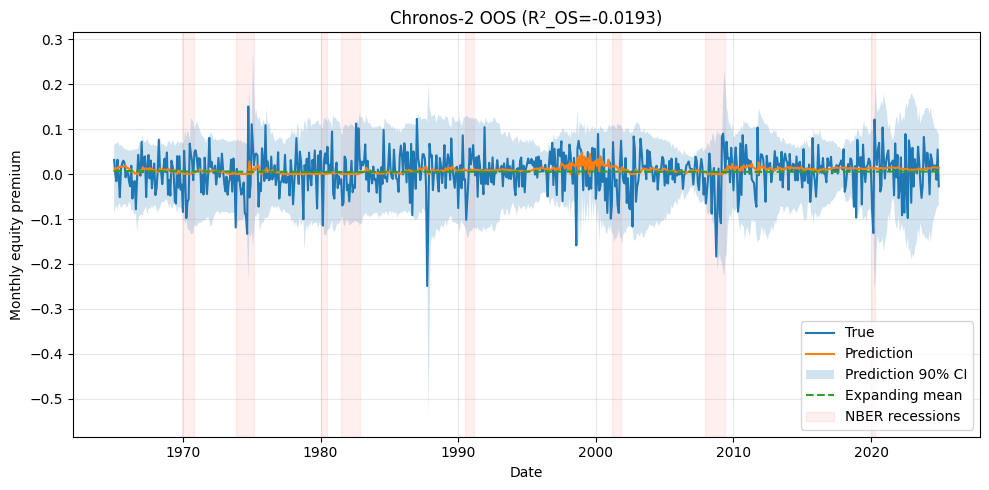

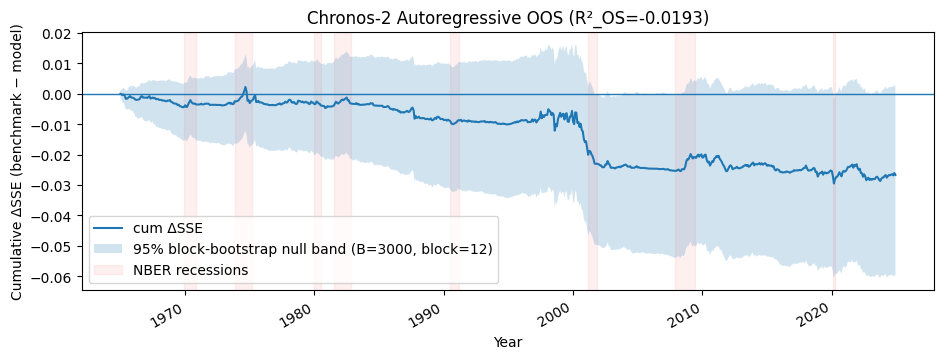

In [5]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M", ci = 0.95,context_length =100
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
#-0.0193

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=MINIMAL_SETTING, start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=True, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/transform/feature.py:161: RuntimeWarning: invalid value encountered in divide
  ar_res = cumsum / indices.astype(float)


KeyboardInterrupt: 

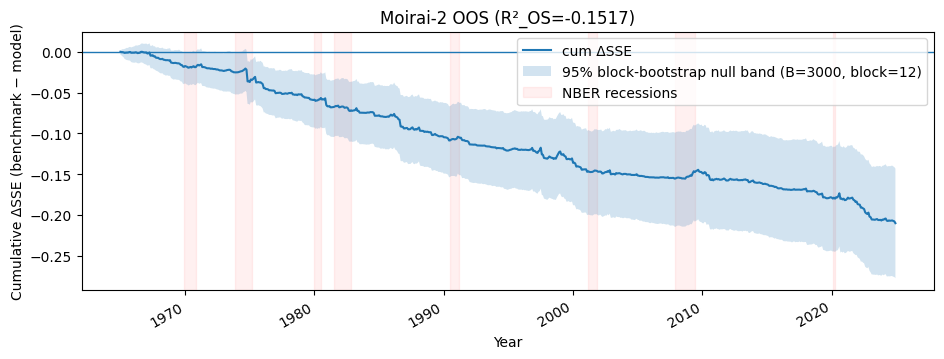

In [ ]:
from importlib import reload
reload(modl)
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=MINIMAL_SETTING, start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=True, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


percentage of negative forecasts before truncation: 29.86%
Manually calculated R2: -0.15172079378387027
evaluate_oos calculated R2 CT: -0.15172079378387027
Manually calculated Stats: {'mean': -0.14935450273061726, 'std': 0.027853353720774864, 'lower': -0.20658456932808994, 'upper': -0.09900356557754628}
evaluate_oos calculated R2 WCT: -0.25275933154916075
Stats WCT: {'mean': -0.25361386941607367, 'std': 0.037710381990428525, 'lower': -0.322448464240756, 'upper': -0.17990685906728426}


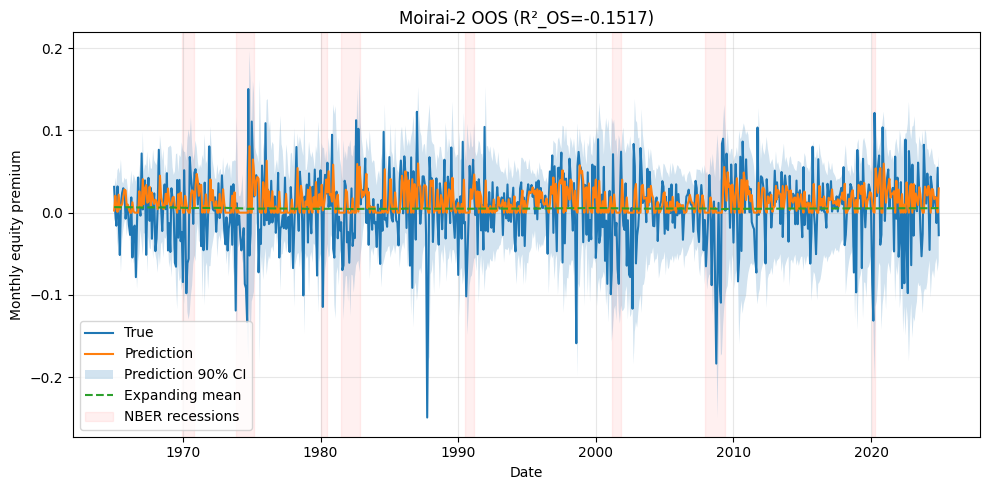

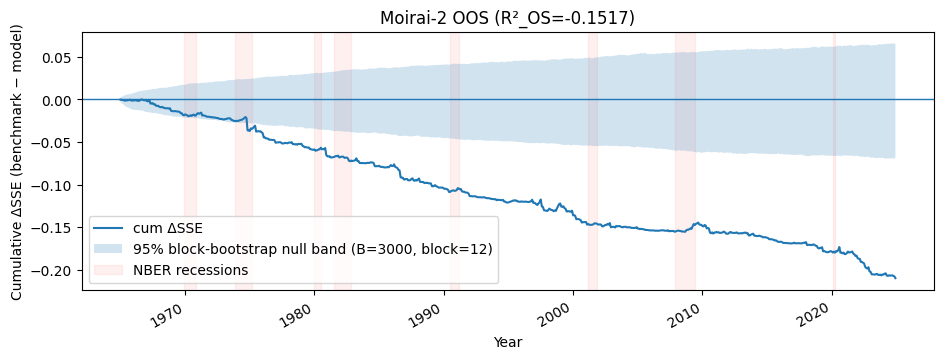

In [17]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=minimal_setting, start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=True, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=True, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=all, start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=False, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=minimal_setting,
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
                            )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag=5,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag = 3,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("equity_premium",),
    start_oos="1965-01-01",
    lag=100,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag=8,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:
r2_values = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=without_lookahead_autoregressive, start_oos="2000-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,12,False,False)
    )


    r2_values.append(r2_m)
sum = 0
for i in r2_values:
    sum += i
avg_r2_1 = sum / len(r2_values)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
r2_values_1 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=without_lookahead, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True)
    )


    r2_values_1.append(r2_m)

In [ ]:
sum = 0
for i in r2_values_1:
    sum += i
avg_r2_1 = sum / len(r2_values_1)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
sum = 0
for i in r2_values:
    sum += i
avg_r2_1 = sum / len(r2_values)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
sum = 0
for i in r2_values_20:
    sum += i
avg_r2_1 = sum / len(r2_values_20)
print("Avg R2 with block size 1:", avg_r2_1)

In [8]:
r2_values_120 = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,True,True)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 120:", avg_r2_1)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 30.58%
Manually calculated R2: 0.015455319021175806
evaluate_oos calculated R2 CT: 0.015455319021175806
Manually calculated Stats: {'mean': 0.01968289984377152, 'std': 0.025197384253520062, 'lower': -0.031408634414500314, 'upper': 0.06893872788375642}
evaluate_oos calculated R2 WCT: 0.0009849262962263738
Stats WCT: {'mean': 0.012717265019869918, 'std': 0.03703690455820045, 'lower': -0.06047126221023823, 'upper': 0.0867668405373816}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 31.40%
Manually calculated R2: -4.6057694669920934e-05
evaluate_oos calculated R2 CT: -4.6057694669920934e-05
Manually calculated Stats: {'mean': 0.008750767291481732, 'std': 0.036539325052394434, 'lower': -0.05709501470286197, 'upper': 0.08894100726744313}
evaluate_oos calculated R2 WCT: 0.012024418596033093
Stats WCT: {'mean': 0.027791166067942265, 'std': 0.0456457755631074, 'lower': -0.06635361759482179, 'upper': 0.11492991413331166}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 31.40%
Manually calculated R2: 0.010407219100855292
evaluate_oos calculated R2 CT: 0.010407219100855292
Manually calculated Stats: {'mean': 0.00888025919527825, 'std': 0.01882688938012919, 'lower': -0.03214795857690165, 'upper': 0.039184927960682084}
evaluate_oos calculated R2 WCT: 0.029251161216131027
Stats WCT: {'mean': 0.03844304227725588, 'std': 0.03286839640671409, 'lower': -0.027073854512332077, 'upper': 0.09493015878767412}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 28.93%
Manually calculated R2: 0.023379859354858645
evaluate_oos calculated R2 CT: 0.023379859354858645
Manually calculated Stats: {'mean': 0.027280043300699587, 'std': 0.016413659775878553, 'lower': -0.005404254420020965, 'upper': 0.05858149518595334}
evaluate_oos calculated R2 WCT: -0.01277554202589859
Stats WCT: {'mean': -0.00921157219071813, 'std': 0.03332275254331402, 'lower': -0.07884930311087537, 'upper': 0.05184842668536264}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 26.45%
Manually calculated R2: -0.0005514284145791137
evaluate_oos calculated R2 CT: -0.0005514284145791137
Manually calculated Stats: {'mean': -0.00456551800740536, 'std': 0.03961053261802545, 'lower': -0.07936704850337216, 'upper': 0.0779795608891816}
evaluate_oos calculated R2 WCT: -0.012603634347551518
Stats WCT: {'mean': -0.017430443609291198, 'std': 0.05078574220365425, 'lower': -0.12134565784107114, 'upper': 0.08152013234965519}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 28.93%
Manually calculated R2: 0.025785234074427454
evaluate_oos calculated R2 CT: 0.025785234074427454
Manually calculated Stats: {'mean': 0.02965782621468539, 'std': 0.01848259624663785, 'lower': -0.0059218097581295644, 'upper': 0.06976418491297409}
evaluate_oos calculated R2 WCT: 0.022559281524996866
Stats WCT: {'mean': 0.02726731377906085, 'std': 0.02303876013225737, 'lower': -0.02095211123012477, 'upper': 0.06724954954042688}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 25.62%
Manually calculated R2: 0.033530203527324276
evaluate_oos calculated R2 CT: 0.033530203527324276
Manually calculated Stats: {'mean': 0.03594409398768959, 'std': 0.020429319020957765, 'lower': -0.003652577295625858, 'upper': 0.07526914257234361}
evaluate_oos calculated R2 WCT: 0.019894055257330234
Stats WCT: {'mean': 0.024479565154678116, 'std': 0.023509830663430487, 'lower': -0.026954837577091672, 'upper': 0.06694131313291452}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 31.40%
Manually calculated R2: 0.02771443148631325
evaluate_oos calculated R2 CT: 0.02771443148631325
Manually calculated Stats: {'mean': 0.035942335482458565, 'std': 0.01787863557104039, 'lower': 0.0008710338178904959, 'upper': 0.07350025171513497}
evaluate_oos calculated R2 WCT: 0.034345971574729295
Stats WCT: {'mean': 0.05190480219128842, 'std': 0.030255745585841307, 'lower': -0.017294997183226683, 'upper': 0.10236553226866478}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 32.23%
Manually calculated R2: 0.04753091760899353
evaluate_oos calculated R2 CT: 0.04753091760899353
Manually calculated Stats: {'mean': 0.05592867045002032, 'std': 0.0198112036976491, 'lower': 0.019459451437187428, 'upper': 0.09740686554734773}
evaluate_oos calculated R2 WCT: 0.04173341221530524
Stats WCT: {'mean': 0.05812884595279939, 'std': 0.027557805315119567, 'lower': 0.00468717199501737, 'upper': 0.11496844074044812}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 28.10%
Manually calculated R2: 0.015341185620470155
evaluate_oos calculated R2 CT: 0.015341185620470155
Manually calculated Stats: {'mean': 0.01792126864865079, 'std': 0.03073717220205864, 'lower': -0.04632976986802251, 'upper': 0.07537063931665061}
evaluate_oos calculated R2 WCT: -0.005533900731654606
Stats WCT: {'mean': 0.005993425293019543, 'std': 0.037318876905489795, 'lower': -0.07173019905869944, 'upper': 0.07595249438153626}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 28.10%
Manually calculated R2: 0.024729326790203787
evaluate_oos calculated R2 CT: 0.024729326790203787
Manually calculated Stats: {'mean': 0.026752190304083493, 'std': 0.026380971558277302, 'lower': -0.01767820344305385, 'upper': 0.0846516935340954}
evaluate_oos calculated R2 WCT: 0.014086437478600944
Stats WCT: {'mean': 0.017969509412966402, 'std': 0.039978984453382646, 'lower': -0.05588805265634525, 'upper': 0.09886167803000054}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 27.27%
Manually calculated R2: -0.025849025593806862
evaluate_oos calculated R2 CT: -0.025849025593806862
Manually calculated Stats: {'mean': -0.02862640132649454, 'std': 0.029536226673217217, 'lower': -0.08425523684699125, 'upper': 0.03343423161237811}
evaluate_oos calculated R2 WCT: -0.03879891988055162
Stats WCT: {'mean': -0.031242333954351692, 'std': 0.033713580351155896, 'lower': -0.0933562762571326, 'upper': 0.03949223604644636}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 28.10%
Manually calculated R2: -0.004871204020776787
evaluate_oos calculated R2 CT: -0.004871204020776787
Manually calculated Stats: {'mean': -0.004572482850670663, 'std': 0.02293768555765618, 'lower': -0.051754158536668364, 'upper': 0.03789917131526194}
evaluate_oos calculated R2 WCT: -0.011246312432735328
Stats WCT: {'mean': -0.005459594404646655, 'std': 0.027214273132991636, 'lower': -0.060795806136360944, 'upper': 0.046676798321505016}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 24.79%
Manually calculated R2: -0.05327314019562146
evaluate_oos calculated R2 CT: -0.05327314019562146
Manually calculated Stats: {'mean': -0.05160038417162279, 'std': 0.03684516916545101, 'lower': -0.11136039508047986, 'upper': 0.025635237975039835}
evaluate_oos calculated R2 WCT: -0.08963247274921282
Stats WCT: {'mean': -0.07389975042426852, 'std': 0.045727154015128724, 'lower': -0.1514613749025875, 'upper': 0.02821516714002564}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 30.58%
Manually calculated R2: 0.03178359938847242
evaluate_oos calculated R2 CT: 0.03178359938847242
Manually calculated Stats: {'mean': 0.035182161310030026, 'std': 0.02745926460004359, 'lower': -0.01355874509781062, 'upper': 0.09777141328241258}
evaluate_oos calculated R2 WCT: 0.05437344934709809
Stats WCT: {'mean': 0.055355296159809754, 'std': 0.03348552636163608, 'lower': -0.016716323372704088, 'upper': 0.11592064541229331}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 28.93%
Manually calculated R2: 0.05135127145808638
evaluate_oos calculated R2 CT: 0.05135127145808638
Manually calculated Stats: {'mean': 0.05465656668307597, 'std': 0.01922435962794682, 'lower': 0.021549566816421437, 'upper': 0.0958377587280439}
evaluate_oos calculated R2 WCT: 0.05724295460603224
Stats WCT: {'mean': 0.0583454988462546, 'std': 0.02429568125878851, 'lower': 0.008197679987077747, 'upper': 0.10428966541597533}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 29.75%
Manually calculated R2: -0.027751663186363906
evaluate_oos calculated R2 CT: -0.027751663186363906
Manually calculated Stats: {'mean': -0.026318623947664276, 'std': 0.024129720417352347, 'lower': -0.06569657566952168, 'upper': 0.028873613968384584}
evaluate_oos calculated R2 WCT: -0.027525488437120993
Stats WCT: {'mean': -0.016138629291586867, 'std': 0.032550886387722695, 'lower': -0.08153248233683935, 'upper': 0.04332426712048981}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 29.75%
Manually calculated R2: 0.0234288688792198
evaluate_oos calculated R2 CT: 0.0234288688792198
Manually calculated Stats: {'mean': 0.029978645698733288, 'std': 0.028727297808828177, 'lower': -0.016720344253592645, 'upper': 0.09372234532043112}
evaluate_oos calculated R2 WCT: 0.017391069385752522
Stats WCT: {'mean': 0.029997572746168422, 'std': 0.03483652188250416, 'lower': -0.02845300785259817, 'upper': 0.10261961834423723}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 32.23%
Manually calculated R2: 0.01749248310791396
evaluate_oos calculated R2 CT: 0.01749248310791396
Manually calculated Stats: {'mean': 0.010807633277451153, 'std': 0.02252517183011122, 'lower': -0.0387186042225478, 'upper': 0.04875971925164821}
evaluate_oos calculated R2 WCT: 0.007791932387877232
Stats WCT: {'mean': 0.0059324347361500935, 'std': 0.03869271499881624, 'lower': -0.0796426232252689, 'upper': 0.07553644345038062}
Avg R2 with block size 120: 0.012399336858552457


In [10]:
r2_values_120_last_changed = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,False,False)
    )


    r2_values_120_last_changed.append(r2_m)
sum = 0
for i in r2_values_120_last_changed:
    sum += i
avg_r2_1 = sum / len(r2_values_120_last_changed)
print("Avg R2 with block size 120:", avg_r2_1)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 27.27%
Manually calculated R2: -0.005240503201586533
evaluate_oos calculated R2 CT: -0.005240503201586533
Manually calculated Stats: {'mean': -0.01679150996800474, 'std': 0.054705465768029586, 'lower': -0.13746434989687356, 'upper': 0.07242719770334392}
evaluate_oos calculated R2 WCT: -0.02841675481628303
Stats WCT: {'mean': -0.04625817193326495, 'std': 0.05972905263444652, 'lower': -0.1847115594049479, 'upper': 0.06042705729411953}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.83%
Manually calculated R2: -0.07377049181256701
evaluate_oos calculated R2 CT: -0.07377049181256701
Manually calculated Stats: {'mean': -0.09132442470114353, 'std': 0.060536978560477864, 'lower': -0.23380960181869226, 'upper': 0.00646573106403388}
evaluate_oos calculated R2 WCT: -0.09750213932884066
Stats WCT: {'mean': -0.1305475867904444, 'std': 0.0678581143829732, 'lower': -0.28409001721324884, 'upper': -0.02638027880303978}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 21.49%
Manually calculated R2: -0.10421779073190773
evaluate_oos calculated R2 CT: -0.10421779073190773
Manually calculated Stats: {'mean': -0.11314491169221304, 'std': 0.0836707262174683, 'lower': -0.3076153002426736, 'upper': 0.009651985506916736}
evaluate_oos calculated R2 WCT: -0.13036928126373093
Stats WCT: {'mean': -0.14407219671918858, 'std': 0.10092728456002029, 'lower': -0.3771955136581736, 'upper': 0.004314755221849501}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 22.31%
Manually calculated R2: -0.06652558122374619
evaluate_oos calculated R2 CT: -0.06652558122374619
Manually calculated Stats: {'mean': -0.09278398598407335, 'std': 0.0877220599908565, 'lower': -0.2940702293061268, 'upper': 0.05422181682126454}
evaluate_oos calculated R2 WCT: -0.13422307016985235
Stats WCT: {'mean': -0.17330839894672168, 'std': 0.0988516056518815, 'lower': -0.40435877213586874, 'upper': -0.008662652063616199}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 23.97%
Manually calculated R2: -0.024684222311580628
evaluate_oos calculated R2 CT: -0.024684222311580628
Manually calculated Stats: {'mean': -0.018035394092191855, 'std': 0.05651490229741362, 'lower': -0.1264480022229386, 'upper': 0.10086369881452371}
evaluate_oos calculated R2 WCT: -0.04027474003484621
Stats WCT: {'mean': -0.020870348352751564, 'std': 0.06245062039938728, 'lower': -0.130057328798158, 'upper': 0.12131049007930127}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 20.66%
Manually calculated R2: -0.10192714333569008
evaluate_oos calculated R2 CT: -0.10192714333569008
Manually calculated Stats: {'mean': -0.10141755582761851, 'std': 0.06225344734406714, 'lower': -0.2542427709022199, 'upper': -0.0018405421677180156}
evaluate_oos calculated R2 WCT: -0.14488436276266103
Stats WCT: {'mean': -0.14861948292817356, 'std': 0.06845180643696601, 'lower': -0.30597458489882434, 'upper': -0.03697782055491201}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 27.27%
Manually calculated R2: -0.1225179042778759
evaluate_oos calculated R2 CT: -0.1225179042778759
Manually calculated Stats: {'mean': -0.11441049135319112, 'std': 0.07016696413166353, 'lower': -0.2769087846327914, 'upper': 0.014637817386831462}
evaluate_oos calculated R2 WCT: -0.18743762104234718
Stats WCT: {'mean': -0.17370845486524897, 'std': 0.07344257936371473, 'lower': -0.34265046214202316, 'upper': -0.057029871106260475}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 24.79%
Manually calculated R2: -0.12331239027181584
evaluate_oos calculated R2 CT: -0.12331239027181584
Manually calculated Stats: {'mean': -0.13762381957380843, 'std': 0.04923691899732303, 'lower': -0.2585317874233485, 'upper': -0.060149348168956694}
evaluate_oos calculated R2 WCT: -0.19460415776088835
Stats WCT: {'mean': -0.22496645450923103, 'std': 0.07378473144971469, 'lower': -0.3992859910463576, 'upper': -0.11053407962145302}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 25.62%
Manually calculated R2: -0.10776223160273202
evaluate_oos calculated R2 CT: -0.10776223160273202
Manually calculated Stats: {'mean': -0.09832976509355867, 'std': 0.06445625256446376, 'lower': -0.2073905511164871, 'upper': 0.03302030471384375}
evaluate_oos calculated R2 WCT: -0.15609803588429738
Stats WCT: {'mean': -0.15385000060449336, 'std': 0.0699477897054694, 'lower': -0.2719268295216846, 'upper': 0.0025156946569109702}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 21.49%
Manually calculated R2: -0.13847669970135512
evaluate_oos calculated R2 CT: -0.13847669970135512
Manually calculated Stats: {'mean': -0.16628391300022016, 'std': 0.1563742603102544, 'lower': -0.5387784142980131, 'upper': 0.03498619350113875}
evaluate_oos calculated R2 WCT: -0.17074533861467267
Stats WCT: {'mean': -0.17902126988366485, 'std': 0.14411828493605142, 'lower': -0.5527519046129592, 'upper': 0.014107807337779698}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.01%
Manually calculated R2: 0.019583950238152625
evaluate_oos calculated R2 CT: 0.019583950238152625
Manually calculated Stats: {'mean': 0.03342116367899386, 'std': 0.03292367773855221, 'lower': -0.026082179380333526, 'upper': 0.10412064980446856}
evaluate_oos calculated R2 WCT: -0.009713294108081305
Stats WCT: {'mean': 0.005360791010578177, 'std': 0.03922430327185603, 'lower': -0.07983649290991139, 'upper': 0.07949020086232729}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 25.62%
Manually calculated R2: -0.10918935354312298
evaluate_oos calculated R2 CT: -0.10918935354312298
Manually calculated Stats: {'mean': -0.1148279396751993, 'std': 0.04403195499115535, 'lower': -0.20836931883062176, 'upper': -0.037407402064305637}
evaluate_oos calculated R2 WCT: -0.15880001675028832
Stats WCT: {'mean': -0.1641103493970984, 'std': 0.062339239661975916, 'lower': -0.31166140416958243, 'upper': -0.058400139490121086}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 22.31%
Manually calculated R2: -0.1890943926346802
evaluate_oos calculated R2 CT: -0.1890943926346802
Manually calculated Stats: {'mean': -0.180124451991917, 'std': 0.059803449946979774, 'lower': -0.2935847544631728, 'upper': -0.05823308170737277}
evaluate_oos calculated R2 WCT: -0.25868013477258645
Stats WCT: {'mean': -0.23863469339302606, 'std': 0.06805733857049275, 'lower': -0.3761017155568367, 'upper': -0.10745809747330784}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 13.22%
Manually calculated R2: -0.08034249961480322
evaluate_oos calculated R2 CT: -0.08034249961480322
Manually calculated Stats: {'mean': -0.08273382200555647, 'std': 0.09493051761474992, 'lower': -0.25860003613119803, 'upper': 0.08928684332078402}
evaluate_oos calculated R2 WCT: -0.09991992214578871
Stats WCT: {'mean': -0.09883476922845708, 'std': 0.09503916204598686, 'lower': -0.2782394935623793, 'upper': 0.08684057987282782}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 21.49%
Manually calculated R2: -0.04384223132539966
evaluate_oos calculated R2 CT: -0.04384223132539966
Manually calculated Stats: {'mean': -0.05006904834799082, 'std': 0.04133511048542804, 'lower': -0.1254352790641671, 'upper': 0.03623966323168326}
evaluate_oos calculated R2 WCT: -0.06376811465793586
Stats WCT: {'mean': -0.08091131876380979, 'std': 0.046944192825557486, 'lower': -0.16550473545000507, 'upper': 0.02120514636316132}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 19.83%
Manually calculated R2: -0.0509870265461978
evaluate_oos calculated R2 CT: -0.0509870265461978
Manually calculated Stats: {'mean': -0.035406022952791445, 'std': 0.0524468529682538, 'lower': -0.16308267469012255, 'upper': 0.04814205900638613}
evaluate_oos calculated R2 WCT: -0.0644653009401317
Stats WCT: {'mean': -0.04999934026022659, 'std': 0.049061648094832495, 'lower': -0.17266500719873043, 'upper': 0.02746693595735278}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 25.62%
Manually calculated R2: 0.03872818425419122
evaluate_oos calculated R2 CT: 0.03872818425419122
Manually calculated Stats: {'mean': 0.03218750261602636, 'std': 0.04128723953685219, 'lower': -0.05568881245580596, 'upper': 0.10336537415917521}
evaluate_oos calculated R2 WCT: 0.036167522814785524
Stats WCT: {'mean': 0.02303130989804225, 'std': 0.04843368141148833, 'lower': -0.08311024353918907, 'upper': 0.10583038737946492}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 17.36%
Manually calculated R2: -0.03628255868665331
evaluate_oos calculated R2 CT: -0.03628255868665331
Manually calculated Stats: {'mean': -0.034629727480325515, 'std': 0.03563188009670901, 'lower': -0.10946373839128481, 'upper': 0.03846177097719223}
evaluate_oos calculated R2 WCT: -0.053808885273663565
Stats WCT: {'mean': -0.060638037987555606, 'std': 0.04394013558627111, 'lower': -0.15715424673562373, 'upper': 0.014888226148148763}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 14.88%
Manually calculated R2: -0.07353440668385014
evaluate_oos calculated R2 CT: -0.07353440668385014
Manually calculated Stats: {'mean': -0.08494250865724991, 'std': 0.07548036070462524, 'lower': -0.24576805946293934, 'upper': 0.07219991078310942}
evaluate_oos calculated R2 WCT: -0.09782958795304353
Stats WCT: {'mean': -0.10058153565078749, 'std': 0.08307688559111046, 'lower': -0.27317432198293357, 'upper': 0.06568094312575753}
Avg R2 with block size 120: -0.07333659436911688


In [17]:
r2_values_120_last_changed

NameError: name 'r2_values_120_last_changed' is not defined

In [7]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
    )
print(r2_m)

[Chronos-2] Loading amazon/chronos-2 on M freq with 28 covariates...
1980-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1980-02-01 00:00:00
1980-03-01 00:00:00
1980-04-01 00:00:00
1980-05-01 00:00:00
1980-06-01 00:00:00
1980-07-01 00:00:00
1980-08-01 00:00:00
1980-09-01 00:00:00
1980-10-01 00:00:00
1980-11-01 00:00:00
1980-12-01 00:00:00
1981-01-01 00:00:00
1981-02-01 00:00:00
1981-03-01 00:00:00
1981-04-01 00:00:00
1981-05-01 00:00:00
1981-06-01 00:00:00
1981-07-01 00:00:00
1981-08-01 00:00:00
1981-09-01 00:00:00
1981-10-01 00:00:00
1981-11-01 00:00:00
1981-12-01 00:00:00
1982-01-01 00:00:00
1982-02-01 00:00:00
1982-03-01 00:00:00
1982-04-01 00:00:00
1982-05-01 00:00:00
1982-06-01 00:00:00
1982-07-01 00:00:00
1982-08-01 00:00:00
1982-09-01 00:00:00
1982-10-01 00:00:00
1982-11-01 00:00:00
1982-12-01 00:00:00
1983-01-01 00:00:00
1983-02-01 00:00:00
1983-03-01 00:00:00
1983-04-01 00:00:00
1983-05-01 00:00:00
1983-06-01 00:00:00
1983-07-01 00:00:00
1983-08-01 00:00:00
1983-09-01 00:00:00
1983-10-01 00:00:00
1983-11-01 00:00:00
1983-12-01 00:00:00
1984-01-01 00:00:00
1984-02-01 00:00:00
1984-03-01 00:00:00


In [18]:
r2_values_120 = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 120:", avg_r2_1)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.005144142756378978
evaluate_oos calculated R2 CT: -0.005144142756378978
Manually calculated Stats: {'mean': -0.004339012667707185, 'std': 0.016236667620550104, 'lower': -0.04106848279835272, 'upper': 0.02672127252614227}
evaluate_oos calculated R2 WCT: -0.005144142756378978
Stats WCT: {'mean': -0.004089325567604448, 'std': 0.01586789081529812, 'lower': -0.03642578265238501, 'upper': 0.026237743475644417}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.0011748104715372243
evaluate_oos calculated R2 CT: -0.0011748104715372243
Manually calculated Stats: {'mean': -0.0009449947546625574, 'std': 0.01633754665006714, 'lower': -0.028469501103859682, 'upper': 0.03709678901790169}
evaluate_oos calculated R2 WCT: -0.0011748104715372243
Stats WCT: {'mean': 0.0006548301676059969, 'std': 0.01616385689200271, 'lower': -0.028159344791734143, 'upper': 0.0349051521746846}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0003866491627947388
evaluate_oos calculated R2 CT: 0.0003866491627947388
Manually calculated Stats: {'mean': -0.0017127102751294775, 'std': 0.018237353373871248, 'lower': -0.041209216628400394, 'upper': 0.0316399127633595}
evaluate_oos calculated R2 WCT: 0.0003866491627947388
Stats WCT: {'mean': -0.0029771508405994594, 'std': 0.01841466303648369, 'lower': -0.043628506446253025, 'upper': 0.030458536909219704}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.003931936475232489
evaluate_oos calculated R2 CT: 0.003931936475232489
Manually calculated Stats: {'mean': 0.00945150450499609, 'std': 0.016468197367744065, 'lower': -0.020439708544654968, 'upper': 0.04390000669592801}
evaluate_oos calculated R2 WCT: 0.003931936475232489
Stats WCT: {'mean': 0.00992641604592525, 'std': 0.016262294137881567, 'lower': -0.023054305813330015, 'upper': 0.043518338464598544}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.010454673644109458
evaluate_oos calculated R2 CT: 0.010454673644109458
Manually calculated Stats: {'mean': 0.012729793500336102, 'std': 0.015820767412012555, 'lower': -0.018398793437840046, 'upper': 0.046079291122455464}
evaluate_oos calculated R2 WCT: 0.010454673644109458
Stats WCT: {'mean': 0.012106789600196009, 'std': 0.01582081055979657, 'lower': -0.01775953751005736, 'upper': 0.045421660306431966}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0034109510647494234
evaluate_oos calculated R2 CT: 0.0034109510647494234
Manually calculated Stats: {'mean': 0.00540497578303807, 'std': 0.018927184504641488, 'lower': -0.026760423544846677, 'upper': 0.050878148919132435}
evaluate_oos calculated R2 WCT: 0.0034109510647494234
Stats WCT: {'mean': 0.006398102200066136, 'std': 0.018644192665392474, 'lower': -0.027052326831169714, 'upper': 0.050161096234224926}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.017010641967339923
evaluate_oos calculated R2 CT: -0.017010641967339923
Manually calculated Stats: {'mean': -0.013730978608079194, 'std': 0.015726633724345945, 'lower': -0.044411107783172324, 'upper': 0.019995531371058816}
evaluate_oos calculated R2 WCT: -0.017010641967339923
Stats WCT: {'mean': -0.012917413280112143, 'std': 0.016017107303228244, 'lower': -0.04385033626050929, 'upper': 0.018755522206789842}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.012285268703834173
evaluate_oos calculated R2 CT: -0.012285268703834173
Manually calculated Stats: {'mean': -0.011428730173174731, 'std': 0.017045616228515168, 'lower': -0.04829174856034577, 'upper': 0.0213523208967421}
evaluate_oos calculated R2 WCT: -0.012285268703834173
Stats WCT: {'mean': -0.01232550051242985, 'std': 0.016606080267286372, 'lower': -0.04979212582816482, 'upper': 0.018340018661797537}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0044573017420067584
evaluate_oos calculated R2 CT: 0.0044573017420067584
Manually calculated Stats: {'mean': 0.0015731157219097006, 'std': 0.014838607386645055, 'lower': -0.02921561479555273, 'upper': 0.030667434236505663}
evaluate_oos calculated R2 WCT: 0.0044573017420067584
Stats WCT: {'mean': 0.0012934016892480118, 'std': 0.015252418341536034, 'lower': -0.03092837843741065, 'upper': 0.02890972016218822}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.00750945358066879
evaluate_oos calculated R2 CT: -0.00750945358066879
Manually calculated Stats: {'mean': -0.007313600188993544, 'std': 0.016654834818701808, 'lower': -0.040265723738035025, 'upper': 0.026196028901851763}
evaluate_oos calculated R2 WCT: -0.00750945358066879
Stats WCT: {'mean': -0.006913707346388951, 'std': 0.016614122743561475, 'lower': -0.040283193125014674, 'upper': 0.025229074775320322}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.011678049451666839
evaluate_oos calculated R2 CT: -0.011678049451666839
Manually calculated Stats: {'mean': -0.010424162847424642, 'std': 0.01848867791163638, 'lower': -0.04630107887024362, 'upper': 0.027400432967674866}
evaluate_oos calculated R2 WCT: -0.011678049451666839
Stats WCT: {'mean': -0.009833610803318632, 'std': 0.01854373507030272, 'lower': -0.046093919380791847, 'upper': 0.0277055762012534}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.01440191037008498
evaluate_oos calculated R2 CT: -0.01440191037008498
Manually calculated Stats: {'mean': -0.01368767314476186, 'std': 0.019017506094035238, 'lower': -0.05274288758213556, 'upper': 0.023206872259513147}
evaluate_oos calculated R2 WCT: -0.01440191037008498
Stats WCT: {'mean': -0.013512343550034046, 'std': 0.018690821737226578, 'lower': -0.04874602326253282, 'upper': 0.02451687924359474}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.0015776464638812548
evaluate_oos calculated R2 CT: -0.0015776464638812548
Manually calculated Stats: {'mean': 0.0009442697842248307, 'std': 0.020582884881729085, 'lower': -0.04331642659337053, 'upper': 0.041265619697493566}
evaluate_oos calculated R2 WCT: -0.0015776464638812548
Stats WCT: {'mean': 0.0011884365766619233, 'std': 0.020502410959547114, 'lower': -0.04228024506980554, 'upper': 0.039713400014770826}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.002453317550793921
evaluate_oos calculated R2 CT: -0.002453317550793921
Manually calculated Stats: {'mean': -0.00018389652333500593, 'std': 0.01921783456253366, 'lower': -0.04346194154686736, 'upper': 0.034686854903744783}
evaluate_oos calculated R2 WCT: -0.002453317550793921
Stats WCT: {'mean': -0.00041582429853737356, 'std': 0.019511986510484133, 'lower': -0.0412424565966014, 'upper': 0.03561810274107001}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.008671875843752064
evaluate_oos calculated R2 CT: -0.008671875843752064
Manually calculated Stats: {'mean': -0.006852373925731423, 'std': 0.015452031559747743, 'lower': -0.03790886878778971, 'upper': 0.022891040789874247}
evaluate_oos calculated R2 WCT: -0.008671875843752064
Stats WCT: {'mean': -0.007660144873683562, 'std': 0.016196103454511206, 'lower': -0.040550695454355475, 'upper': 0.026511688575183396}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.005496953166848728
evaluate_oos calculated R2 CT: 0.005496953166848728
Manually calculated Stats: {'mean': 0.006958527304031488, 'std': 0.010631393144202798, 'lower': -0.012177874919016389, 'upper': 0.0294772488681656}
evaluate_oos calculated R2 WCT: 0.005496953166848728
Stats WCT: {'mean': 0.0065310370175540216, 'std': 0.010534916524676311, 'lower': -0.013526150290919536, 'upper': 0.029874616557421636}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.0004301690366109723
evaluate_oos calculated R2 CT: 0.0004301690366109723
Manually calculated Stats: {'mean': 0.0029190486743080066, 'std': 0.015998308945153895, 'lower': -0.026578440635359905, 'upper': 0.03725609507200689}
evaluate_oos calculated R2 WCT: 0.0004301690366109723
Stats WCT: {'mean': 0.0016153213301585033, 'std': 0.016092005275986743, 'lower': -0.030186314806985786, 'upper': 0.036150229645200996}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: -0.008408472561221458
evaluate_oos calculated R2 CT: -0.008408472561221458
Manually calculated Stats: {'mean': -0.008246667879962762, 'std': 0.01657931996466978, 'lower': -0.03741009871581073, 'upper': 0.026777197757721603}
evaluate_oos calculated R2 WCT: -0.008408472561221458
Stats WCT: {'mean': -0.00832037241155014, 'std': 0.01697380369200218, 'lower': -0.03753444269501067, 'upper': 0.02758014131438977}


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


percentage of negative forecasts before truncation: 0.00%
Manually calculated R2: 0.002641842313466647
evaluate_oos calculated R2 CT: 0.002641842313466647
Manually calculated Stats: {'mean': 0.0010024143154907814, 'std': 0.023053963620927726, 'lower': -0.03774477164208654, 'upper': 0.05157072141696585}
evaluate_oos calculated R2 WCT: 0.002641842313466647
Stats WCT: {'mean': 0.0010979345196808167, 'std': 0.022863882672819195, 'lower': -0.04031370109269734, 'upper': 0.050070125805630666}
Avg R2 with block size 120: -0.0031107954271231784
